## Importar Librerias

In [69]:
# Importar Librerias.

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

# <center> Transformada Discreta de Fourier (DFT) <center>

##### https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html

## Ejemplo 1

#### Generate 3 sine waves with frequencies 1 Hz, 4 Hz, and 7 Hz, amplitudes 3, 1 and 0.5, and phase all zeros. Add this 3 sine waves together with a sampling rate 100 Hz, you will see that it is the same signal we just shown at the beginning of the section.

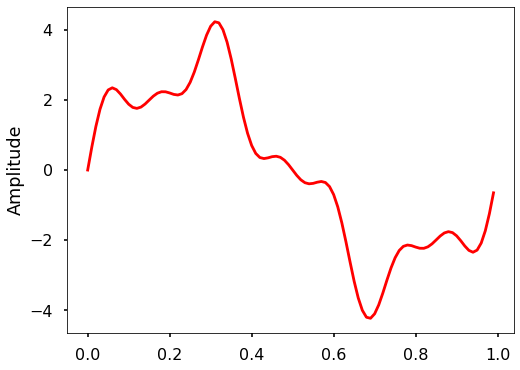

In [81]:
# Tasa de Muestreo 
sr = 100
# Intervalo de Muestreo 
ts = 1.0/sr
t = np.arange(0,1,ts)

# Señal seno de frecuencia 1 Hz y amplitud 3
freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

# Suman Señal seno de frecuencia 4 Hz y amplitud 1

freq = 4
x += np.sin(2*np.pi*freq*t)

# Suma Señal seno de frecuencia 7 Hz y amplitud 0.5

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)


# Muestreo de la señal en funchion del tiempo 

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()


# Ejemplo 2

#### Write a function DFT(x) which takes in one argument, x - input 1 dimensional real-valued signal. The function will calculate the DFT of the signal and return the DFT values. Apply this function to the signal we generated above and plot the result.

#### Trnasformada de fourier discreta:

$$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}}$$

In [82]:

def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

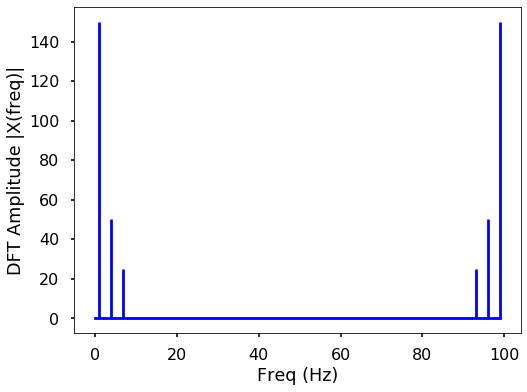

In [83]:
X = DFT(x)

# Calcular frecuencia: 
#   T Periodo de Muestreo 
#   sr Tasa de Muestro 
#   N longitud de la Tranformada 

N = len(X)
n = np.arange(N)
T = N/(sr) 
freq = n/T 

# Muestro de la transformacion en funcion de la frecuencia de muestreo :

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b',markerfmt=" ", basefmt="-b",use_line_collection=True) 
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

# Ejemplo 3

#### Write a function to generate a simple signal with different sampling rate, and see the difference of computing time by varying the sampling rate.

In [84]:
#Funcion para generar una señal con tasa de muestreo diferente y frecuencia de 1 Hz y amplitud 3:

def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [85]:
# sampling rate =200
sr = 200
%timeit DFT(gen_sig(sr))

5.87 ms ± 315 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [86]:
# sampling rate 2000
sr = 2000
%timeit DFT(gen_sig(sr))

316 ms ± 31.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Amedida que aumenta la tasa de muestreo el tiempo que toma en realizar el muestro va ha aumentar 

#  <center> FFT Algorithm vs DFT Algorithm <center>

#### https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.03-Fast-Fourier-Transform.html

#### https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/


#### Tranformada rapida de fourier es el mas importante algoritmo en el procesamiento senales y  analisis de datos,pues este reduce considerablemente la complegidad de tiempo de  calculo de la transformada de fourier discreta que corresponde a  O(n^2) que significa que cuando la cantidad de datos aumenta n veces, el consumo de tiempo aumenta en un múltiplo cuadrado de n, que es una complejidad temporal mayor que la lineal, es reducida a O(nlog(n)) que es n veces log(n) esta complejidad es mayor que lineal y menor que cuadrada.

<p style="text-align:center;">
<img src="time-complexity-examples.png" width="300" height="300" >


## De DTF a FFT

#### Partiendo de la Transformada discreta de fourier:

$$X_k = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}}$$

#### Si escalamos el muestreo de la Transformada Discreta  a valores de N:

$$X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{(k+N)n/N}}} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{n}}\cdot e^{-i2\pi{kn/N}}}$$

#### Usando la identidad $e^{-i2\pi{n}} = 1$ tenemos que, para calcular la magnitud de de los punto de muestra en un periodo completo solo es necesrio calcular los primeros puntos.
$$X_{k+N} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} = X_k$$


$$ X_{k+i\cdot N} = X_k $$

#### Este resultado es de vital importancia para la reduccion del calculo de la transformada.

#### Cooley y Tukey mostraron que es posible dividir las DFT en secciones mas pequeñas de N a N/2 y estas a valores mucho mas pequeños en la misma proporcion como se muestra a contanuacion: 


$$ X_{k} = \sum_{n=0}^{N-1}{x_n\cdot e^{-i2\pi{kn/N}}} $$ 
$$       = \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{k(2m)/N}}} + \sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{k(2m+1)/N}}} $$ 
$$       = \sum_{m=0}^{N/2-1}{x_{2m}\cdot e^{-i2\pi{km/(N/2)}}} + e^{-i2\pi{k/N}}\sum_{m=0}^{N/2-1}{x_{2m+1}\cdot e^{-i2\pi{km/(N/2)}}} $$

 

#### Tenemos de la descomposicion parte par e impar asi podemos usar la propiedad de  simetria en cada uno de los terminos por lo que solo es necesario carcular la mitad de los campos en cada termino.

# Ejemplo 1:

#### Use the FFT function to calculate the Fourier transform of the above signal. Plot the amplitude spectrum for both the two-sided and one-side frequencies.

In [87]:
# Transformada Rapida de Fourier

def FFT(x):
    """
    A recursive implementation of 
    the 1D Cooley-Tukey FFT, the 
    input should have a length of 
    power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate(\
            [X_even+factor[:int(N/2)]*X_odd,
             X_even+factor[int(N/2):]*X_odd])
        return X

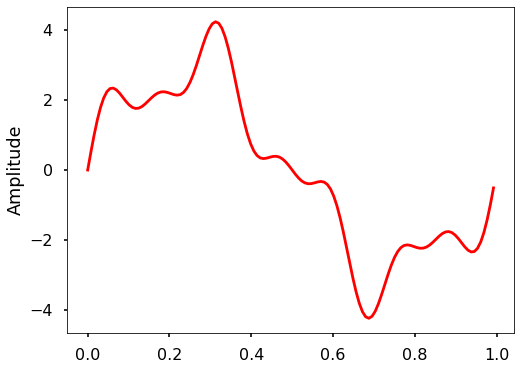

In [99]:
# Tasa de Muestreo
sr = 128
# Intervalo de muestro 
ts = 1.0/sr
t = np.arange(0,1,ts)


# Suma de señales 3 señales:
#     Señal de frecuencia 1 Hz y amplitud 3
#     Señal de frecuencia 4 Hz y amplitud 1
#     Señal de frecuencia 7 Hz y amplitud 0.5

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

# Graficar Muestro 

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

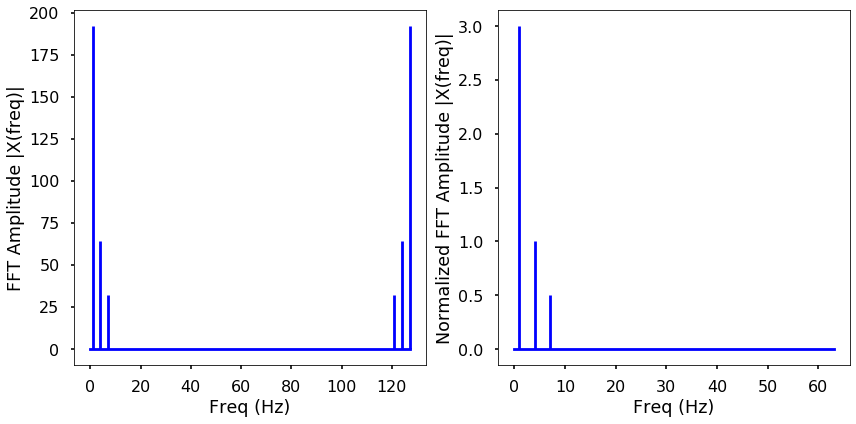

In [100]:
# Aplicar Transformda 

X=FFT(x)

# Calcular frecuencia: 
#   T Periodo de Muestreo 
#   sr Tasa de Muestro 
#   N longitud de la Tranformada 

N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

### Graficar Muestro de la Transformacion

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b" ,use_line_collection= True)
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

### Normalizar Muestro de Transformacion 

# Normalizamos mitad del espectro.
n_oneside = N//2

# Tomar mitad del intervalo de la frecuencia.
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

### Graficar Muestro de la Transformacion Normalizado 

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b" , use_line_collection= True)
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

# Ejemplo 2

#### Generate a simple signal for length 2048, and time how long it will run the FFT and compare the speed with the DFT.

In [101]:
#Funcion para generar una señal con tasa de muestreo diferente y frecuencia de 1 Hz y amplitud 3:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [102]:
# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

30.5 ms ± 7.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### Vemos que a diferencia de la transformada de fourier discreta DTF , el uso de la transformada rapida de fourier es mucho mas eficiente debido a la disminucion de la complejidad de calculo de la transformada.

# <center> FFT in Python <center>

#### https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

### FFT in Numpy


In [127]:
from numpy.fft import fft, ifft 

### FFT in Scipy

In [128]:
# from scipy.fftpack import fft, ifft 

# Ejemplo 1:

### Electricity demand in California

#### Explore the electricity demand from California from 2019-11-30 to 2019-12-30
#### https://www.eia.gov/electricity/gridmonitor/dashboard/custom/pending

In [129]:
# Importamos panadas para leer el dataframe.

import pandas as pd


In [130]:

# Leer el Dataframe .csv que muestra la demanda de electricidad de california en el intervalo de tiempo 2019/11/30 a 2019/12/30

df = pd.read_csv('./data/930-data-export.csv', 
                 delimiter=',', parse_dates=[1])

# Renombramos los titulos del dataflame 
# Para reducir la complegidad de la etiqueta

df.rename(columns={'Timestamp (Hour Ending)':'hour',
                   'Demand (MWh)':'demand'},
          inplace=True)


/home/jhonatan/.local/lib/python3.8/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [131]:
df

,Region Code,hour,demand,Demand Forecast (MWh),Net Generation (MWh),Total Interchange (MWh)
0,CAL,2019-11-30 00:00:00,27559,27673,15924,-8632
1,CAL,2019-11-30 01:00:00,26316,26588,15095,-8563
2,CAL,2019-11-30 02:00:00,25559,25697,14551,-8573
3,CAL,2019-11-30 03:00:00,24909,25162,14274,-8497
4,CAL,2019-11-30 04:00:00,24656,24905,14457,-8204
...,...,...,...,...,...,...
740,CAL,2019-12-30 20:00:00,34447,35029,19212,-10029
741,CAL,2019-12-30 21:00:00,33678,34129,18904,-9727
742,CAL,2019-12-30 22:00:00,32365,32674,18353,-9776
743,CAL,2019-12-30 23:00:00,30265,30407,17603,-8464


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


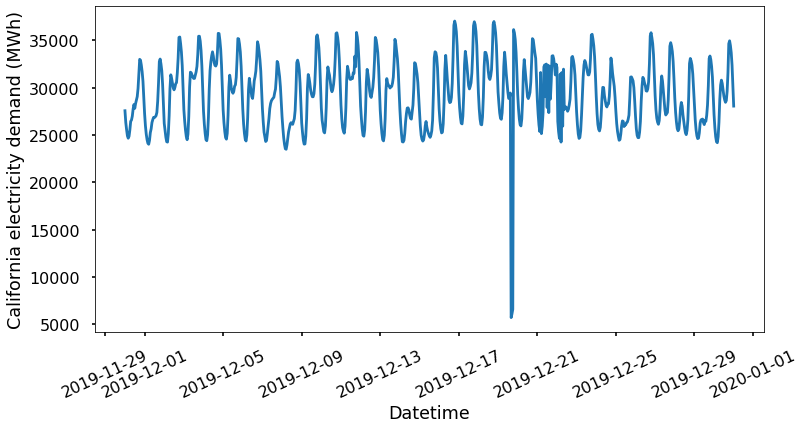

In [132]:
# Graficar demanda de electricidad (MWh) en el intervalo de tiempo en horas.

plt.figure(figsize = (12, 6))
plt.plot(df['hour'], df['demand'])
plt.xlabel('Datetime')
plt.ylabel('California electricity demand (MWh)')
plt.xticks(rotation=25) 
plt.show()

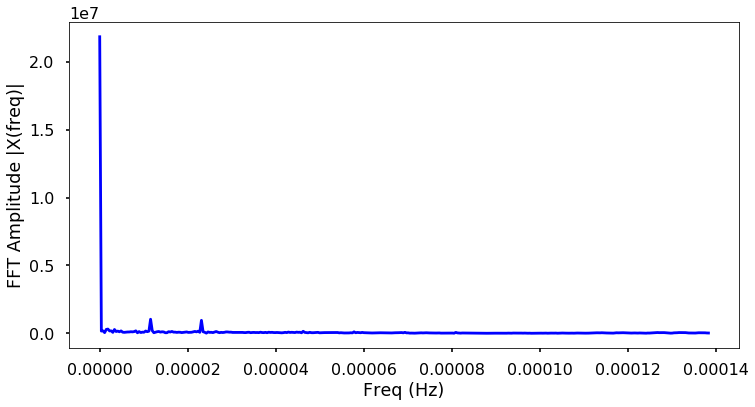

In [133]:
# Calcuamos la yranaformada rapida de fourier de la demanda de electricidad.
X = fft(df['demand'])


# Calculamos la frecuencia de muestreo
N = len(X)
n = np.arange(N)
# get the sampling rate
sr = 1 / (60*60)
T = N/sr
freq = n/T 

# Normalizamos el espectro para solo la mitad del intervalo por simetria

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

plt.figure(figsize = (12, 6))
plt.plot(f_oneside, np.abs(X[:n_oneside]), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

#### la FFT muestra tres picos , pero es dificil de determinar la frecuencia al que corresponden, asi que traduciremos esa frecuencia en horas de tal manera podremos ver a que hora estan asociados los picos

/tmp/ipykernel_27636/1034189290.py:2: RuntimeWarning: divide by zero encountered in divide
  t_h = 1/f_oneside / (60 * 60)


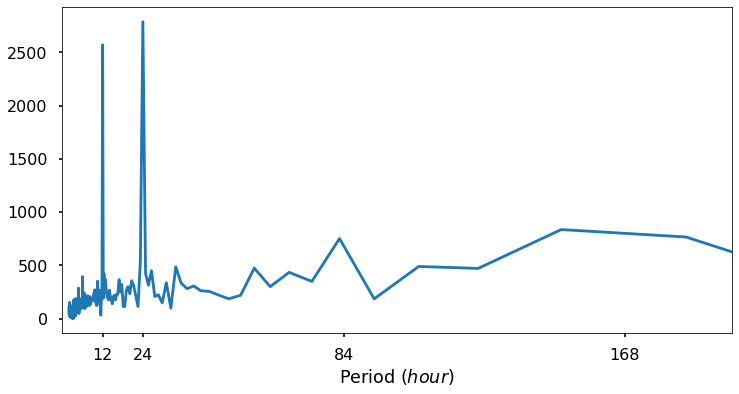

In [134]:
# convert frequency to hour
t_h = 1/f_oneside / (60 * 60)

plt.figure(figsize=(12,6))
plt.plot(t_h, np.abs(X[:n_oneside])/n_oneside)
plt.xticks([12, 24, 84, 168])
plt.xlim(0, 200)
plt.xlabel('Period ($hour$)')
plt.show()

#### Vemos tres picos asociados a 12 , 24 , 84 horas que corresponden ha horas asociadas al patron de actividad humana.

## Ejemplo 2

#### Filtranado una senal usando FFT

In [135]:
from scipy.fftpack import fftfreq

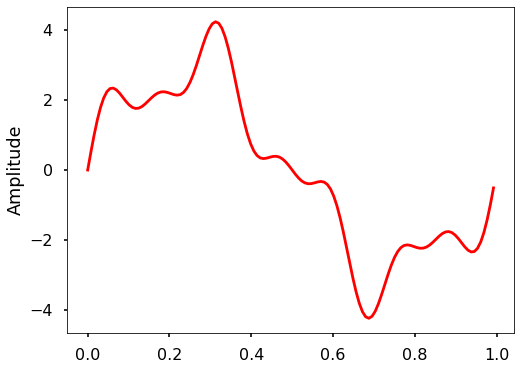

In [136]:
# Tasa de Muestreo
sr = 128
# Intervalo de muestro 
ts = 1.0/sr
t = np.arange(0,1,ts)


# Suma de señales 3 señales:
#     Señal de frecuencia 1 Hz y amplitud 3
#     Señal de frecuencia 4 Hz y amplitud 1
#     Señal de frecuencia 7 Hz y amplitud 0.5

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

# Graficar Muestro 

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

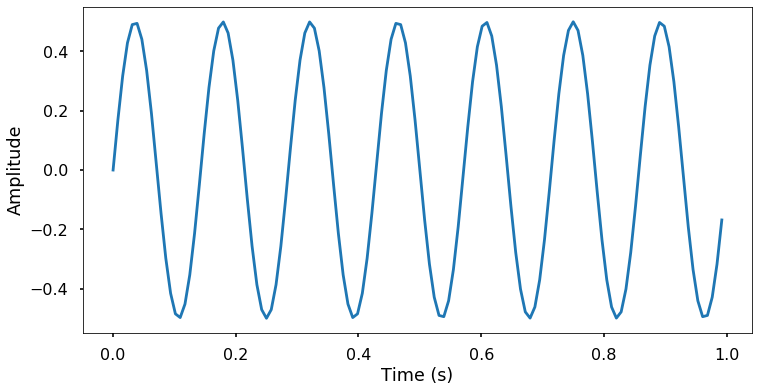

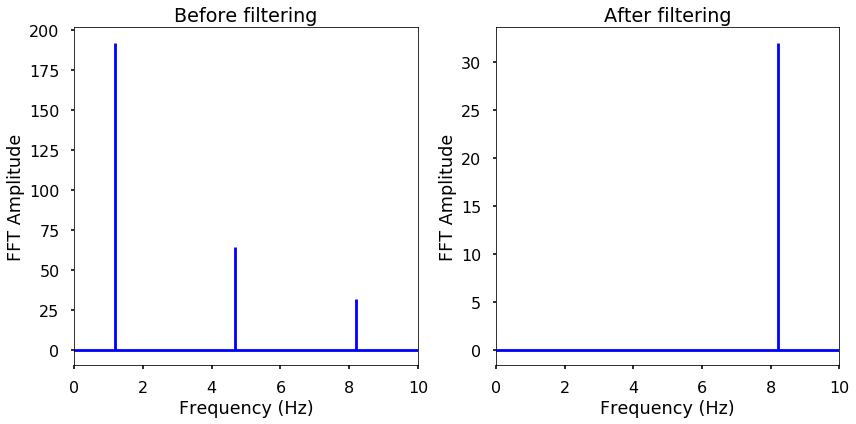

In [146]:
# Calculamos la tranasformada de fourier rapida de X
sig_fft = fft(x)

# Copiamos el resultado a sig_fft_filtered
sig_fft_filtered = sig_fft.copy()

# Obtenienedo las frecuencias 
freq = fftfreq(len(x), d=1./150)

# Frecuencia de corte Pasa altas
cut_off = 6

# Filtro paso altas

sig_fft_filtered[np.abs(freq) < cut_off] = 0

# Filtrado de la señal en el dominio del tiempo ( Tranformacion inversa de la señal)
filtered = ifft(sig_fft_filtered)

# Grafica la Amplitud Transformada inversa de la funcion TRanaformada filtrada a frecuencias pasa altas.
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Grafica la Amplitud de la tranasformada de fourier rapida.
plt.figure(figsize = (12, 6))

plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', markerfmt=" ", basefmt="-b",use_line_collection= True)
plt.title('Before filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')

# Grafica la Amplitud de la tranasformada de fourier rapida filtrada.

plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', markerfmt=" ", basefmt="-b" ,use_line_collection= True)
plt.title('After filtering')
plt.xlim(0, 10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()